In [1]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Tensorflow basic manipulation
### Adding constant

In [2]:
a = tf.constant(1., dtype = tf.float32)
b = tf.constant(2., dtype = tf.float32)
c = a + b
d = a * b
with tf.Session() as sess:
    [c1,d1,a1,b1] = sess.run([c,d,a,b])
    print('a =', a1,'\nb =', b1, '\nc =', c1, '\nd =', d1)

a = 1.0 
b = 2.0 
c = 3.0 
d = 2.0


### Adding arrays as external inputs

In [3]:
a = tf.placeholder(tf.float32, [3,])
b = tf.placeholder(tf.float32, [3,])
c = a + b
d = a * b
with tf.Session() as sess:
    [c1,d1,a1,b1] = sess.run([c,d,a,b], feed_dict={a:np.array([1,2,3]), b:np.array([4,5,6])})
    print('a =', a1,'\nb =', b1, '\nc =', c1, '\nd =', d1)

a = [1. 2. 3.] 
b = [4. 5. 6.] 
c = [5. 7. 9.] 
d = [ 4. 10. 18.]


### Linear regression with gradient descent optimization

In [4]:
# ground truth of weights and bias
real_w = np.array([[2.5],[1.5],[-3.2]])
real_b = 10.

# use tf.placeholder as empty tensors that receive inputs
x = tf.placeholder(tf.float32, [None,3])
y = tf.placeholder(tf.float32, [None,1])

# use tf.Variable to set up weights and bias
w = tf.Variable(tf.random_normal([3, 1], stddev=0.01), dtype = tf.float32, name="weights")
b = tf.Variable(tf.random_normal([1, 1], stddev=0.01), dtype = tf.float32, name="bias")

# write down the model
y_hat = tf.matmul(x,w) + b

# write down loss function: mean square error
loss = tf.reduce_mean((y-y_hat)**2)

# set up optimizer and operation for minimizing loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
opt = optimizer.minimize(loss)

# set up batch size and epochs
batch_size = 32
epochs = 1000
loss_list = []
w_list = []
b_list = []

# start a tf.Session to run the for loop
with tf.Session() as sess:
    # initialize all variables
    sess.run(tf.global_variables_initializer())
    
    for i in range(epochs):
        # sample x
        x_batch = np.random.normal(0,3,(batch_size,3))
        
        # compute y and add some noise
        y_batch = np.dot(x_batch,real_w) + real_b + np.random.normal(0,0.05,(batch_size,1))
        
        # run the optimization and query the loss, w, b for this iteration
        _, this_loss, this_w, this_b = sess.run([opt, loss, w, b], feed_dict={x:x_batch, y:y_batch})
        
        # append loss, w and b
        loss_list.append(this_loss)
        w_list.append(this_w)
        b_list.append(this_b)



Instructions for updating:
Colocations handled automatically by placer.


weights =  [[ 2.5052967]
 [ 1.5077991]
 [-3.1986754]] 
bias = [[8.644744]]


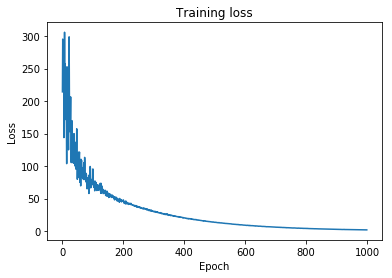

In [5]:
# show the results
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss')
print('weights = ', w_list[-1], '\nbias =', b_list[-1])